## Boston House Price Prediction (Kaggle Dataset)

Boston house prices dataset
---------------------------
 
**Data Set Characteristics:**  
 
    :Number of Instances: 506 
 
    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
 
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
 


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data_path = os.path.join("..", "data", "boston.csv")
boston_df = pd.read_csv(data_path)

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [4]:
boston_df.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [5]:
boston_df.shape

(506, 14)

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


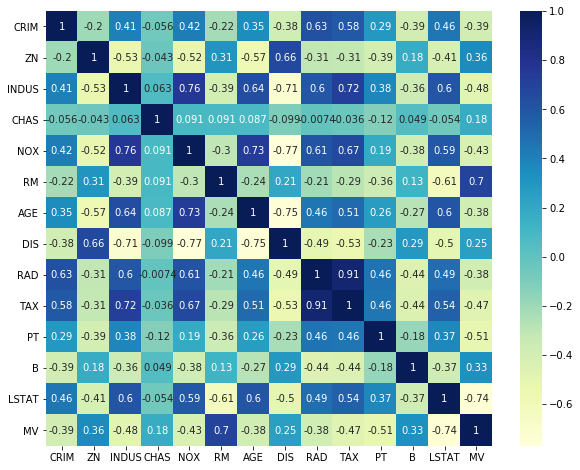

In [7]:
# graphical representation of correlation
plt.figure(figsize=(10,8))
corrmat = boston_df.corr()
top_corr_features = corrmat.index
g = sns.heatmap(boston_df[top_corr_features].corr(), annot=True, cmap="YlGnBu")

## Simple Linear Regression (Univariate)

* Predicted Value/ Dependent Variable - MV
* Predictors/ Independent Variable - LSTAT

In [8]:
# selecting features
X = boston_df["LSTAT"].values.reshape(-1,1)
y = boston_df["MV"].values

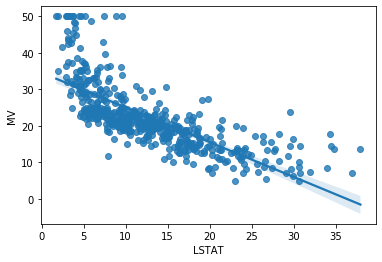

In [9]:
plt.figure(figsize=(6,4))
sns.regplot(X, y)
plt.xlabel("LSTAT")
plt.ylabel("MV")
plt.show()

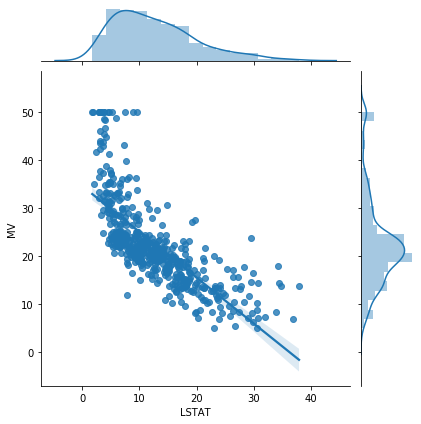

In [10]:
sns.jointplot(x="LSTAT", y="MV", data=boston_df, kind="reg")
plt.show()

In [11]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# coefficient for X and and the y-intercept
print('coefficient: ', lm.coef_)
print('intercept: ', lm.intercept_)

coefficient:  [-0.9681408]
intercept:  34.78978079775008


#### Predictive Analysis

In [14]:
y_train_predictions = lm.predict(X_train)

In [15]:
y_test_predictions = lm.predict(X_test)

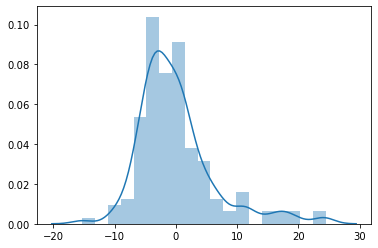

In [16]:
sns.distplot(y_test - y_test_predictions)

#### Residual Analysis

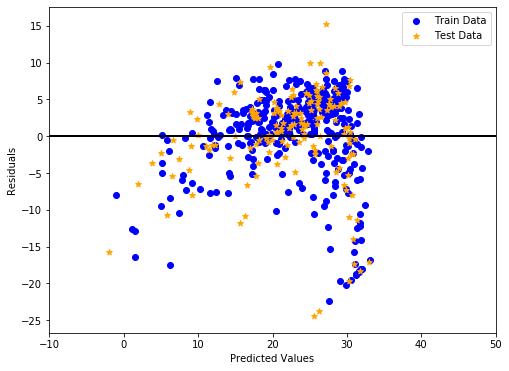

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_predictions, y_train_predictions-y_train, c="blue", marker="o", label="Train Data")
plt.scatter(y_test_predictions, y_test_predictions-y_test, c="orange", marker="*", label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="k")
plt.xlim([-10, 50])
plt.show()

#### Checking for Mean Squared Error (MSE)

In [18]:
from sklearn import metrics

In [19]:
print('MSE for training data:', metrics.mean_squared_error(y_train, y_train_predictions))

MSE for training data: 37.933977702864404


In [20]:
print('MSE for testing data:', metrics.mean_squared_error(y_test, y_test_predictions))

MSE for testing data: 39.817150856746764


#### Coefficient of Determination R**2

In [21]:
from sklearn.metrics import r2_score 

In [22]:
# R2 for training data
print("Coefficient of determination R^2 <-- on train set:", r2_score(y_train, y_train_predictions))

Coefficient of determination R^2 <-- on train set: 0.5524780840257784


In [23]:
# R2 for test data
print("Coefficient of determination R^2 <-- on test set:", r2_score(y_test, y_test_predictions))

Coefficient of determination R^2 <-- on test set: 0.5218049488178007


#### Hypothesis Testing - Statsmodel

In [24]:
import scipy
import statsmodels.api as sm

# adding constant term to allow statsmodel.api to calculate the bias/ intercepts 
X_constant = sm.add_constant(X)
pd.DataFrame(X_constant)

# Fit regression model
results = sm.OLS(y, X_constant).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        08:02:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [25]:
# sm.OLS?


## Multiple Linear Regression

* Predicted Value/ Dependent Variable - 'MV'
* Predictors/ Independent Variable - 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PT', 'B', 'LSTAT'

In [26]:
# selecting features
X = boston_df.iloc[:, :-1] 
y = boston_df["MV"] 

In [27]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# coefficient for X and and the y-intercept
print('coefficients: ', lm.coef_)
print('intercept: ', lm.intercept_)

coefficients:  [-1.21310405e-01  4.44664229e-02  1.13417464e-02  2.51124643e+00
 -1.62312552e+01  3.85906775e+00 -9.98516517e-03 -1.50026949e+00
  2.42143508e-01 -1.10716120e-02 -1.01775267e+00  6.81446564e-03
 -4.86738097e-01]
intercept:  37.937110444532294


#### Predictive Analysis

In [30]:
y_train_predictions = lm.predict(X_train)

In [31]:
y_test_predictions = lm.predict(X_test)

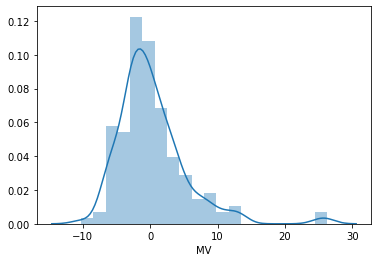

In [32]:
sns.distplot(y_test - y_test_predictions)

#### Residual Analysis

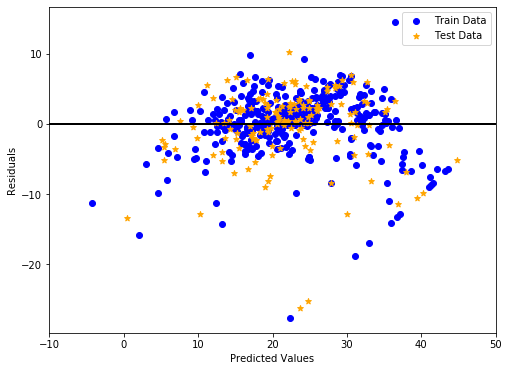

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_predictions, y_train_predictions-y_train, c="blue", marker="o", label="Train Data")
plt.scatter(y_test_predictions, y_test_predictions-y_test, c="orange", marker="*", label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="k")
plt.xlim([-10, 50])
plt.show()

#### Checking for Mean Squared Error (MSE)

In [34]:
print('MSE for training data:', metrics.mean_squared_error(y_train, y_train_predictions))

MSE for training data: 19.95821981502232


In [35]:
from sklearn import metrics
print('MSE for testing data:', metrics.mean_squared_error(y_test, y_test_predictions))

MSE for testing data: 27.195965837541046


#### Coefficient of Determination R**2

In [36]:
from sklearn.metrics import r2_score 

In [37]:
# R2 for training data
print("Coefficient of determination R^2 <-- on train set:", r2_score(y_train, y_train_predictions))

Coefficient of determination R^2 <-- on train set: 0.7645451041012494


In [38]:
# R2 for test data
print("Coefficient of determination R^2 <-- on test set:", r2_score(y_test, y_test_predictions))

Coefficient of determination R^2 <-- on test set: 0.673382550086989


#### Statsmodel

In [39]:
import scipy
import statsmodels.api as sm

# adding constant term to allow statsmodel.api to calculate the bias/ intercepts 
X_constant = sm.add_constant(X)
pd.DataFrame(X_constant).head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [40]:
# Fit regression model
model = sm.OLS(y, X_constant).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        08:02:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## Detecting Collinearity with Eigenvectors 

In [41]:
eigenvalues, eigenvectors = np.linalg.eig(boston_df.corr())

In [42]:
# smaller values indicate that there is the presence collinearity
pd.Series(eigenvalues).sort_values()

8     0.060327
9     0.134010
12    0.182987
13    0.212790
11    0.252257
10    0.277264
7     0.403077
6     0.535411
5     0.660011
4     0.850899
3     0.886540
2     1.348906
1     1.649532
0     6.545990
dtype: float64

Note that index 8 with eigenvalue of 0.0603, is near to zero or very small compared to others. Small values represents presence of collinearity. 

In [43]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9     0.698822
8     0.634975
2     0.235473
13    0.134127
1     0.096297
4     0.087649
12    0.083144
0     0.059114
10    0.055738
7     0.047124
6     0.038227
3     0.023489
11    0.016165
5     0.007191
dtype: float64

Note that index 9, 8, 2 have very high loading when compared against the rest

In [44]:
print(boston_df.columns[2], boston_df.columns[8], boston_df.columns[9])

INDUS RAD TAX


These are the variables that are causing multicollinearity problem.

## Feature Selection (Scaling)

* Check direction of coefficient
* Impact of the variable/ factor on the model

In [45]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


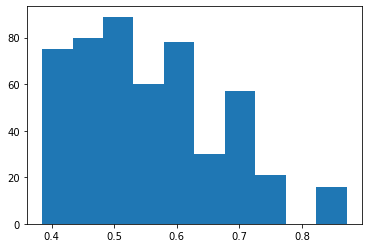

In [46]:
plt.hist(boston_df["NOX"])
plt.show()

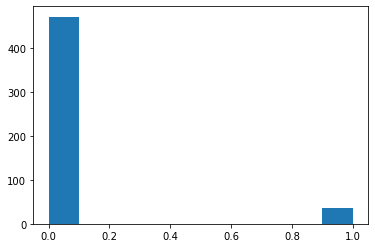

In [47]:
plt.hist(boston_df["CHAS"])
plt.show()

#### Standardise variable to identify key feature(s) 

In [48]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
result = pd.DataFrame(list(zip(model.coef_, boston_df.columns)), columns=["coefficient", "name"]).set_index("name")
np.abs(result).sort_values(by="coefficient", ascending=False)

,coefficient
name,
NOX,17.766615
RM,3.809865
CHAS,2.686734
DIS,1.475567
PT,0.952747
LSTAT,0.524758
RAD,0.306050
CRIM,0.108011
ZN,0.046420


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
stand_coef_linear_reg = make_pipeline(scaler, model)

In [51]:
stand_coef_linear_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [52]:
# standardizing the variables so that the values are converted to lie between -3 and +3
result = pd.DataFrame(list(zip(stand_coef_linear_reg.steps[1][1].coef_, boston_df.columns)),
                      columns=["coefficient", "name"]).set_index("name")
np.abs(result).sort_values(by="coefficient", ascending=False)

,coefficient
name,
LSTAT,3.743627
DIS,3.104044
RM,2.674230
RAD,2.662218
TAX,2.076782
PT,2.060607
NOX,2.056719
ZN,1.081569
CRIM,0.928146


### Implementing Linear Regression with important features based on standardized results

In [53]:
# selecting features
X = boston_df[["LSTAT", "DIS", "RM", "RAD", "TAX", "PT", "NOX", "ZN", "CRIM", "B", "CHAS", "INDUS"]] 
y = boston_df["MV"] 

In [54]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# coefficient for X and and the y-intercept
print('coefficients: ', lm.coef_)
print('intercept: ', lm.intercept_)

coefficients:  [-5.00004284e-01 -1.45385487e+00  3.79623590e+00  2.46448467e-01
 -1.12033624e-02 -1.02536884e+00 -1.70784727e+01  4.57578938e-02
 -1.20469962e-01  6.68253461e-03  2.47891888e+00  1.33132247e-02]
intercept:  38.26923315054901


#### Predictive Analysis

In [57]:
y_train_predictions = lm.predict(X_train)

In [58]:
y_test_predictions = lm.predict(X_test)

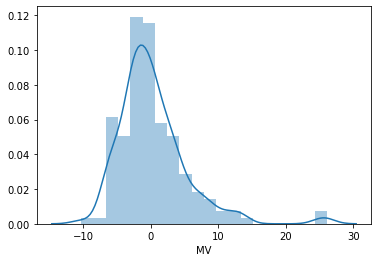

In [59]:
sns.distplot(y_test - y_test_predictions)

#### Residual Analysis

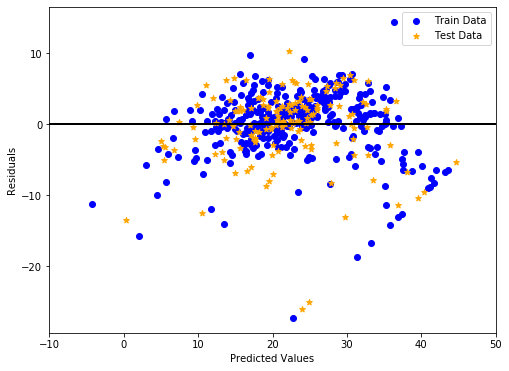

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_predictions, y_train_predictions-y_train, c="blue", marker="o", label="Train Data")
plt.scatter(y_test_predictions, y_test_predictions-y_test, c="orange", marker="*", label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="k")
plt.xlim([-10, 50])
plt.show()

#### Checking for Mean Squared Error (MSE)

In [61]:
print('MSE for training data:', metrics.mean_squared_error(y_train, y_train_predictions))

MSE for training data: 19.981780134494915


In [62]:
from sklearn import metrics
print('MSE for testing data:', metrics.mean_squared_error(y_test, y_test_predictions))

MSE for testing data: 27.036172104941382


#### Coefficient of Determination R**2

In [63]:
from sklearn.metrics import r2_score 

In [64]:
# R2 for training data
print("Coefficient of determination R^2 <-- on train set:", r2_score(y_train, y_train_predictions))

Coefficient of determination R^2 <-- on train set: 0.7642671538321284


In [65]:
# R2 for test data
print("Coefficient of determination R^2 <-- on test set:", r2_score(y_test, y_test_predictions))

Coefficient of determination R^2 <-- on test set: 0.6753016369753002


## Polynomial Regression - With One Variable (Univariate)

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
# selecting features
X = boston_df["LSTAT"].values
y = boston_df["MV"].values

In [68]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Quadratic

In [69]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

In [70]:
polyreg = LinearRegression()
polyreg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred = polyreg.predict(X_test_poly)

In [72]:
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.596442771755864


In [73]:
X_fit = np.arange(X_test.min(), X_test.max(), 1)[:, np.newaxis]
y_pred = polyreg.predict(poly.fit_transform(X_fit.reshape(-1, 1)))

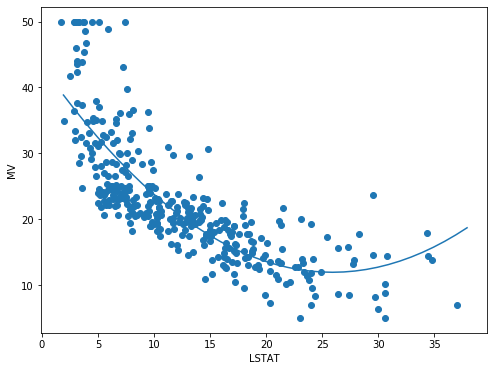

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train) 
plt.plot(X_fit, y_pred)
plt.xlabel("LSTAT")
plt.ylabel("MV")
plt.show()

In [75]:
# X_fit

### Cubic

In [76]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train.reshape(-1, 1))

polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_pred = polyreg.predict(poly.fit_transform(X_test.reshape(-1, 1)))

In [78]:
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.6145861580394884


In [79]:
X_fit = np.arange(X_test.min(), X_test.max(), 1)[:, np.newaxis]

In [80]:
y_pred = polyreg.predict(poly.fit_transform(X_fit.reshape(-1, 1)))

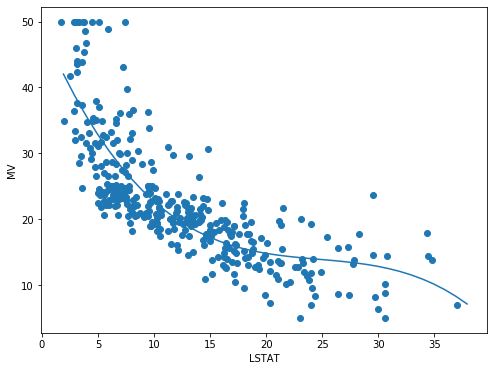

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.plot(X_fit, y_pred)
plt.xlabel("LSTAT")
plt.ylabel("MV")
plt.show()

### Degree 4

In [82]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train.reshape(-1, 1))

polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_pred = polyreg.predict(poly.fit_transform(X_test.reshape(-1, 1)))

In [84]:
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.6415805374009136


In [85]:
X_fit = np.arange(X_test.min(), X_test.max(), 1)[:, np.newaxis]

In [86]:
y_pred = polyreg.predict(poly.fit_transform(X_fit.reshape(-1, 1)))

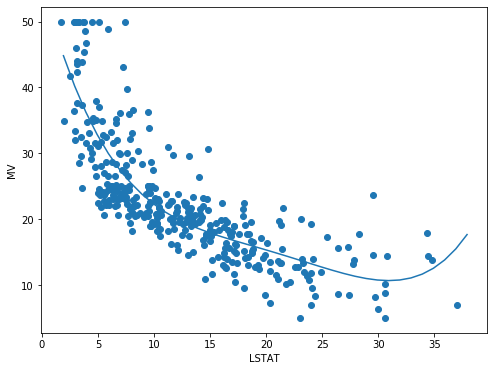

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.plot(X_fit, y_pred)
plt.xlabel("LSTAT")
plt.ylabel("MV")
plt.show()

Degree 4 has returned maximum R square value. After this the R square remains approximately same til degree 6 and then starts decreasing with degree 7 or more.

## Polynomial Regression - With Multiple Variable (Multivariate)

In [88]:
# selecting features
X = boston_df.iloc[:, :-1].values 
y = boston_df["MV"].values 

In [89]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [90]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
y_pred = polyreg.predict(poly.fit_transform(X_test))

In [92]:
r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 0.6516664443204021


In [93]:
print('MSE for testing data:', metrics.mean_squared_error(y_test, y_pred))

MSE for testing data: 29.0041682796023
